# Features Engineering

In this notebook I'll create typical technical analysis features for ML models to be trained in.


In [1]:
%pylab inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import ta

Populating the interactive namespace from numpy and matplotlib


[ta documentation](https://technical-analysis-library-in-python.readthedocs.io/en/latest/)

In [2]:
from ta.utils import dropna
from ta.volatility import BollingerBands
from ta.volatility import AverageTrueRange
from ta.momentum import UltimateOscillator
from ta.momentum import ROCIndicator

In [3]:
df = pd.read_csv('forex.csv', index_col=['date'], parse_dates=['date'], dayfirst=True)
columns_list = df.columns
df

,open,high,low,close,volume
date,,,,,
2011-03-29,1.40860,1.41480,1.40470,1.41130,64044
2011-03-30,1.41130,1.41460,1.40520,1.41260,70281
2011-03-31,1.41270,1.42320,1.41160,1.41740,73492
2011-04-01,1.41730,1.42450,1.40610,1.42340,70943
2011-04-04,1.42310,1.42680,1.41920,1.42180,61094
...,...,...,...,...,...
2019-02-11,1.13181,1.13293,1.12666,1.12746,42001
2019-02-12,1.12740,1.13389,1.12569,1.13241,43338
2019-02-13,1.13231,1.13407,1.12592,1.12592,45751


## Bollinger Bands

In [4]:
indicator_bb = BollingerBands(close=df["close"], window=20, window_dev=2, fillna=True)
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm
date,,,,,,,,
2011-03-29,1.40860,1.41480,1.40470,1.41130,64044,1.411300,1.411300,1.411300
2011-03-30,1.41130,1.41460,1.40520,1.41260,70281,1.413250,1.410650,1.411950
2011-03-31,1.41270,1.42320,1.41160,1.41740,73492,1.419013,1.408520,1.413767
2011-04-01,1.41730,1.42450,1.40610,1.42340,70943,1.425675,1.406675,1.416175
2011-04-04,1.42310,1.42680,1.41920,1.42180,61094,1.426915,1.407685,1.417300
...,...,...,...,...,...,...,...,...
2019-02-11,1.13181,1.13293,1.12666,1.12746,42001,1.148816,1.128365,1.138591
2019-02-12,1.12740,1.13389,1.12569,1.13241,43338,1.148648,1.127659,1.138154
2019-02-13,1.13231,1.13407,1.12592,1.12592,45751,1.149253,1.125743,1.137498


In [5]:
#df = dropna(df)
#df

## Volatility
Average True Range (ATR)

The indicator provide an indication of the degree of price volatility. Strong moves, in either direction, are often accompanied by large ranges, or large True Ranges.

In [6]:
ATR = ta.volatility.AverageTrueRange(close=df["close"],high=df['high'],low=df["low"], window=20,fillna=True)

In [7]:
df['ATR'] = ATR.average_true_range()
df.head()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR
date,,,,,,,,,
2011-03-29,1.4086,1.4148,1.4047,1.4113,64044,1.411300,1.411300,1.411300,0.0
2011-03-30,1.4113,1.4146,1.4052,1.4126,70281,1.413250,1.410650,1.411950,0.0
2011-03-31,1.4127,1.4232,1.4116,1.4174,73492,1.419013,1.408520,1.413767,0.0
2011-04-01,1.4173,1.4245,1.4061,1.4234,70943,1.425675,1.406675,1.416175,0.0
2011-04-04,1.4231,1.4268,1.4192,1.4218,61094,1.426915,1.407685,1.417300,0.0


In [8]:
df.tail()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR
date,,,,,,,,,
2019-02-11,1.13181,1.13293,1.12666,1.12746,42001,1.148816,1.128365,1.138591,0.006581
2019-02-12,1.12740,1.13389,1.12569,1.13241,43338,1.148648,1.127659,1.138154,0.006662
2019-02-13,1.13231,1.13407,1.12592,1.12592,45751,1.149253,1.125743,1.137498,0.006736
2019-02-14,1.12585,1.13090,1.12484,1.12937,53280,1.149291,1.124775,1.137033,0.006703
2019-02-15,1.12927,1.12961,1.12334,1.12476,26285,1.149843,1.123091,1.136467,0.006681


## Momentum

In [9]:
#UltimateOscillator


The **Rate-of-Change (ROC)** indicator, which is also referred to as simply Momentum, is a pure momentum oscillator that measures the percent change in price from one period to the next. The ROC calculation compares the current price with the price “n” periods ago. 

In [10]:
ROCI_10 = ta.momentum.ROCIndicator(df['close'], window=10, fillna=True)
ROCI_20 = ta.momentum.ROCIndicator(df['close'], window=20, fillna=True)
ROCI_40 = ta.momentum.ROCIndicator(df['close'], window=40, fillna=True)
ROCI_60 = ta.momentum.ROCIndicator(df['close'], window=60, fillna=True)
ROCI_120 = ta.momentum.ROCIndicator(df['close'], window=120, fillna=True)

In [11]:
df["ROCI_10"] = ROCI_10.roc()
df["ROCI_20"] = ROCI_20.roc()
df["ROCI_40"] = ROCI_40.roc()
df["ROCI_60"] = ROCI_60.roc()
df["ROCI_120"] = ROCI_120.roc()

## Column for classification

In [12]:
close_price = df["close"].values.tolist()
close_Y = [0]
for i in range(1, len(close_price)):
    if close_price[i] > close_price[i - 1]:
        close_Y.append(1)
    else:       
        close_Y.append(0)

df['close_change'] = close_Y

## Summary

In [13]:
df.tail()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR,ROCI_10,ROCI_20,ROCI_40,ROCI_60,ROCI_120,close_change
date,,,,,,,,,,,,,,,
2019-02-11,1.13181,1.13293,1.12666,1.12746,42001,1.148816,1.128365,1.138591,0.006581,-1.322457,-1.678716,-0.730788,-0.439758,-2.974966,0
2019-02-12,1.12740,1.13389,1.12569,1.13241,43338,1.148648,1.127659,1.138154,0.006662,-0.927376,-0.765894,0.179586,-0.779806,-3.021350,1
2019-02-13,1.13231,1.13407,1.12592,1.12592,45751,1.149253,1.125743,1.137498,0.006736,-1.904546,-1.150979,-0.768526,-1.678397,-3.711559,0
2019-02-14,1.12585,1.13090,1.12484,1.12937,53280,1.149291,1.124775,1.137033,0.006703,-1.317664,-0.816742,-0.570498,-0.657958,-3.519653,1
2019-02-15,1.12927,1.12961,1.12334,1.12476,26285,1.149843,1.123091,1.136467,0.006681,-1.787414,-0.996409,-1.095654,-1.172129,-3.608800,0


In [14]:
df.describe()

,open,high,low,close,volume,bb_bbh,bb_bbl,bb_bbm,ATR,ROCI_10,ROCI_20,ROCI_40,ROCI_60,ROCI_120,close_change
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,1.224839,1.229779,1.219965,1.224812,69968.092285,1.247025,1.205254,1.226140,0.009823,-0.099127,-0.204027,-0.410370,-0.609505,-1.093864,0.493652
std,0.110876,0.111035,0.110473,0.110868,31029.993580,0.112603,0.110062,0.110884,0.002995,1.635318,2.195566,3.018703,3.802620,5.536124,0.500082
min,1.038700,1.041720,1.033950,1.038710,1.000000,1.059360,1.028955,1.047205,0.000000,-6.168910,-8.097425,-10.397940,-15.711385,-17.914863,0.000000
25%,1.125185,1.130540,1.120327,1.125290,50027.500000,1.144809,1.106788,1.123544,0.007888,-1.105194,-1.502548,-2.287100,-2.946041,-4.577367,0.000000
50%,1.222320,1.227165,1.216680,1.221240,66702.500000,1.242740,1.202059,1.225930,0.009194,-0.069678,-0.151828,-0.119153,-0.320050,-0.822442,0.000000
75%,1.321507,1.326790,1.316503,1.321623,85864.750000,1.344603,1.301213,1.321040,0.011114,0.938442,1.243434,1.523167,1.912003,2.689585,1.000000
max,1.482900,1.493800,1.480300,1.482900,251895.000000,1.500058,1.422685,1.457885,0.018876,5.800075,7.404680,8.255540,9.285537,12.921290,1.000000


Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений.

In [15]:
df.count()

open            2048
high            2048
low             2048
close           2048
volume          2048
bb_bbh          2048
bb_bbl          2048
bb_bbm          2048
ATR             2048
ROCI_10         2048
ROCI_20         2048
ROCI_40         2048
ROCI_60         2048
ROCI_120        2048
close_change    2048
dtype: int64

In [16]:
#df.fillna(0,inplace = True) #заполняем пропуски

## Plots

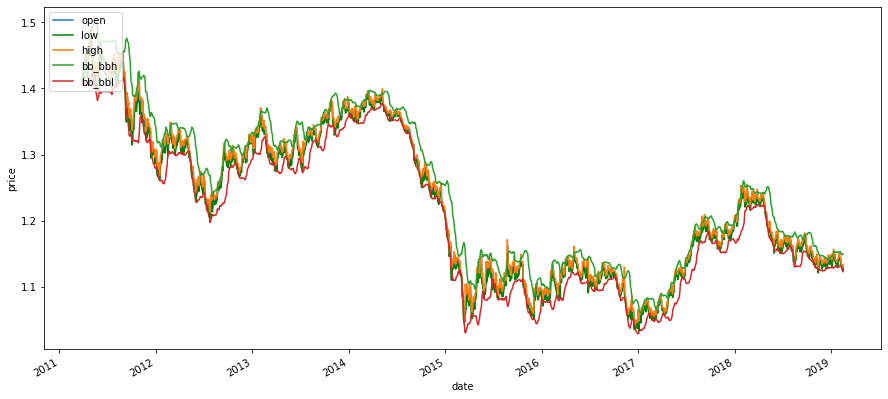

In [17]:
plt.figure(figsize(15,7))
df.open.plot()
df.low.plot(color='g')
df.high.plot()
df.bb_bbh.plot()
df.bb_bbl.plot()
plt.ylabel('price')
plt.legend(loc='upper left')
pylab.show()

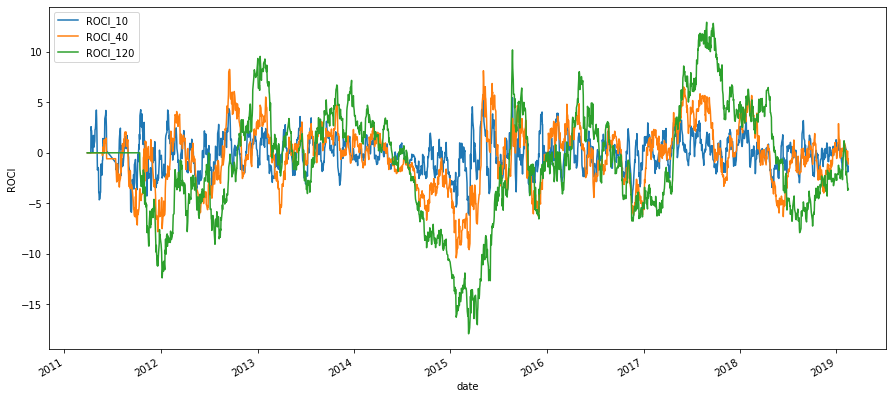

In [22]:
plt.figure(figsize(15,7))
df.ROCI_10.plot()
#df.ROCI_20.plot()
df.ROCI_40.plot()
df.ROCI_120.plot()
plt.ylabel('ROCI')
plt.legend(loc='upper left')
pylab.show()

Text(0, 0.5, 'ATR')

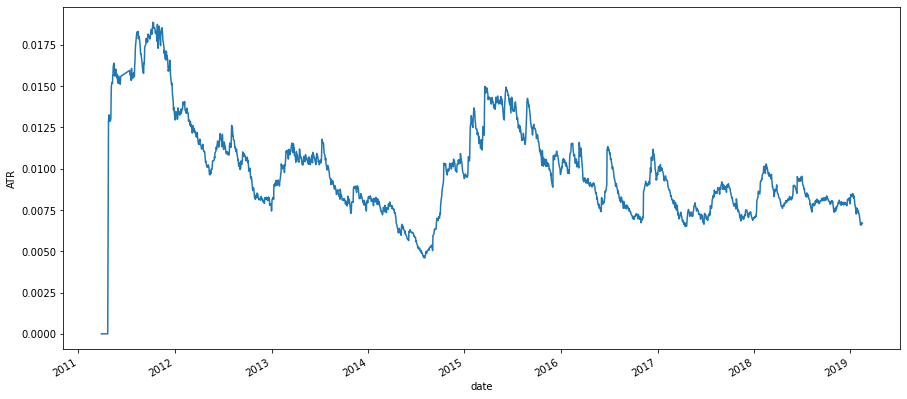

In [19]:
df.ATR.plot()
plt.ylabel('ATR')

## Saving the data

In [20]:
df.to_csv('data_ML.csv')